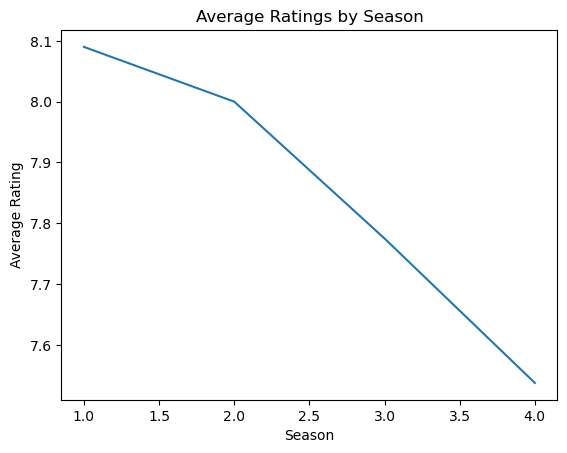

Highly Rated Episodes:
Trompe L'Oeil
The Well-Tempered Clavier
The Bicameral Mind
Kiksuya
Vanishing Point
The Passenger

 ******Episodes Aired Before May 2019:******
The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger

Season 1:
Highest Rating Episode: The Bicameral Mind  
Lowest Rating Episode: The Stray

Season 2:
Highest Rating Episode: Kiksuya  
Lowest Rating Episode: Akane No Mai

Season 3:
Highest Rating Episode: Parce Domine  
Lowest Rating Episode: Decoherence

Season 4:
Highest Rating Episode: Zhuangzi  
Lowest Rating Episode: The Auguries



 Overall Ratings by Season:
Season 1: 8.09
Season 2: 8.0
Season 3: 7.775
Season 4: 7.5375000000000005

Season 1:
Most Popular Episode: The Bicameral Mind
Summary: Delores finds out the truth about Willia

In [6]:
import requests
import matplotlib.pyplot as plt

def download_data(url):
    response = requests.get(url)
    data = response.json()
    return data

def get_season_ratings(data):
    season_ratings = {}
    for episode in data["_embedded"]["episodes"]:
        season = episode["season"]
        rating = float(episode["rating"]["average"])
        if season in season_ratings:
            season_ratings[season].append(rating)
        else:
            season_ratings[season] = [rating]
    return season_ratings

def get_season_ratings(data):
    season_ratings = {}
    for episode in data["_embedded"]["episodes"]:
        season = episode["season"]
        rating = float(episode["rating"]["average"])
        if season in season_ratings:
            season_ratings[season].append(rating)
        else:
            season_ratings[season] = [rating]
    return season_ratings

def get_overall_ratings(season_ratings):
    overall_ratings = {}
    for season, ratings in season_ratings.items():
        overall_ratings[season] = sum(ratings) / len(ratings)
    return overall_ratings

def plot_season_ratings(season_ratings):
    seasons = sorted(season_ratings.keys())
    ratings = [sum(season_ratings[season]) / len(season_ratings[season]) for season in seasons]

    plt.plot(seasons, ratings)
    plt.xlabel("Season")
    plt.ylabel("Average Rating")
    plt.title("Average Ratings by Season")
    plt.show()

def get_highly_rated_episodes(data, rating_threshold):
    highly_rated_episodes = []
    for episode in data["_embedded"]["episodes"]:
        if float(episode["rating"]["average"]) > rating_threshold:
            highly_rated_episodes.append(episode["name"])
    return highly_rated_episodes

def get_episodes_before_date(data, target_date):
    episodes_before_date = []
    for episode in data["_embedded"]["episodes"]:
        air_date = episode["airdate"]
        if air_date < target_date:
            episodes_before_date.append(episode["name"])
    return episodes_before_date

def get_episode_with_highest_lowest_rating(data, season):
    episodes = data["_embedded"]["episodes"]
    season_episodes = [episode for episode in episodes if episode["season"] == season]
    highest_rating_episode = max(season_episodes, key=lambda x: float(x["rating"]["average"]))
    lowest_rating_episode = min(season_episodes, key=lambda x: float(x["rating"]["average"]))
    return highest_rating_episode["name"], lowest_rating_episode["name"], 

def get_summary_most_popular_episode(data, season):
    episodes = data["_embedded"]["episodes"]
    season_episodes = [episode for episode in episodes if episode["season"] == season]
    most_popular_episode = max(season_episodes, key=lambda x: float(x["rating"]["average"]))
    return most_popular_episode["name"], most_popular_episode["summary"]

# Downloading the data
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
data = download_data(url)

# ● Get all the overall ratings for each season and using plots compare the ratings for all the
#seasons, like season 1 ratings, season 2, and so on.
season_ratings = get_season_ratings(data)
plot_season_ratings(season_ratings)

# ● Get all the episode names, whose average rating is more than 8 for every season
highly_rated_episodes = get_highly_rated_episodes(data, 8)
print("Highly Rated Episodes:")
for episode in highly_rated_episodes:
    print(episode)


# ● Get all the episode names that aired before May 2019
episodes_before_date = get_episodes_before_date(data, "2019-05")
print("\n ******Episodes Aired Before May 2019:******")
for episode in episodes_before_date:
    print(episode)

# ● Get the episode name from each season with the highest and lowest rating
for season in season_ratings.keys():
    highest_rating_episode, lowest_rating_episode = get_episode_with_highest_lowest_rating(data, season)
    print(f"\nSeason {season}:")
    print("Highest Rating Episode:", highest_rating_episode," ")
    print("Lowest Rating Episode:", lowest_rating_episode,)

overall_ratings = get_overall_ratings(season_ratings)

# Print the overall ratings for each season
print("\n\n\n Overall Ratings by Season:")
for season, rating in overall_ratings.items():
    print(f"Season {season}: {rating}")
    
# ● Get the summary for the most popular ( ratings ) episode in every season
for season in season_ratings.keys():
    most_popular_episode, summary = get_summary_most_popular_episode(data, season)
    print(f"\nSeason {season}:")
    print("Most Popular Episode:", most_popular_episode)
    print("Summary:", summary.replace("<p>", "").replace("</p>", ""))
